# Metrics vs Predictions

In `PhiSpy` there are lots of metrics that you can adapt to suit your needs, but how important is each metric in each prediction?

We have a [snakefile](https://github.com/linsalrob/PhiSpy/blob/master/scripts/phispy_metrics.snakefile) that will make all possible combinations of metrics and run them for you. 

The [parsing code](https://github.com/linsalrob/PhiSpy/blob/master/scripts/summarize_metrics_output.py) generates two files: the first is a list of a code (just an `int`) and the combination of metrics. This is just so the other table is not so big. 

The second output is the table of Accuracy, Precision, Recall, Specificity, and F<sub>1</sub> score for each metric.

In [1]:
import os, sys
import itertools
import re
import json
%matplotlib inline
from random import randint
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gzip
from math import log, e
from scipy import stats
from math import sqrt

### Read the metrics

In [2]:
mdf = pd.read_csv('metric_codes.tsv', delimiter="\t", index_col=0, names=['Code', 'Metric'], header=None)
mdf.head(30)

,Metric
Code,
0,none
1,pg0
2,orf_length_med
3,shannon_slope
4,at_skew


In [26]:
mdf.tail(30)

,Metric
Code,
225,none pg0 orf_length_med at_skew gc_skew phmms
226,none pg0 orf_length_med at_skew max_direction ...
227,none pg0 orf_length_med gc_skew max_direction ...
228,none pg0 shannon_slope at_skew gc_skew max_dir...
229,none pg0 shannon_slope at_skew gc_skew phmms
230,none pg0 shannon_slope at_skew max_direction p...
231,none pg0 shannon_slope gc_skew max_direction p...
232,none pg0 at_skew gc_skew max_direction phmms
233,none orf_length_med shannon_slope at_skew gc_s...


### Read the results file.

Note that we deliberately set the data types here, because pandas was not guessing them correctly.

In [4]:
dtypes={'Genome': object, 'Metric':np.int64, 'Accuracy':np.float64, 'Precision':np.float64, 'Recall':np.float64, 'Specificity':np.float64, 'F1 score':np.float64}
measures = pd.read_csv("phispy_metrics_tptn.tsv", delimiter="\t", dtype=dtypes, header=None, names=["Genome", "Metric", "Accuracy", "Precision", "Recall", "Specificity", 'F1 score'])
measures.head()

,Genome,Metric,Accuracy,Precision,Recall,Specificity,F1 score
0,Mesorhizobium_loti_MAFF303099,0,0.973,0.000,0.000,0.996,NaN
1,Escherichia_coli_O157-H7_EDL933,0,0.973,0.868,0.920,0.980,0.893
2,Escherichia_coli_CFT073,0,0.993,0.920,0.951,0.995,0.936
3,Escherichia_coli_O157-H7,0,0.978,0.903,0.930,0.985,0.916
4,Ralstonia_solanacearum_GMI1000,0,0.973,0.093,0.308,0.978,0.143


### Plot the first and last metrics

These sort of represent "none" and "all", but not really. It is a good first look though!

[Text(0, 0, 'None'), Text(0, 0, 'All')]

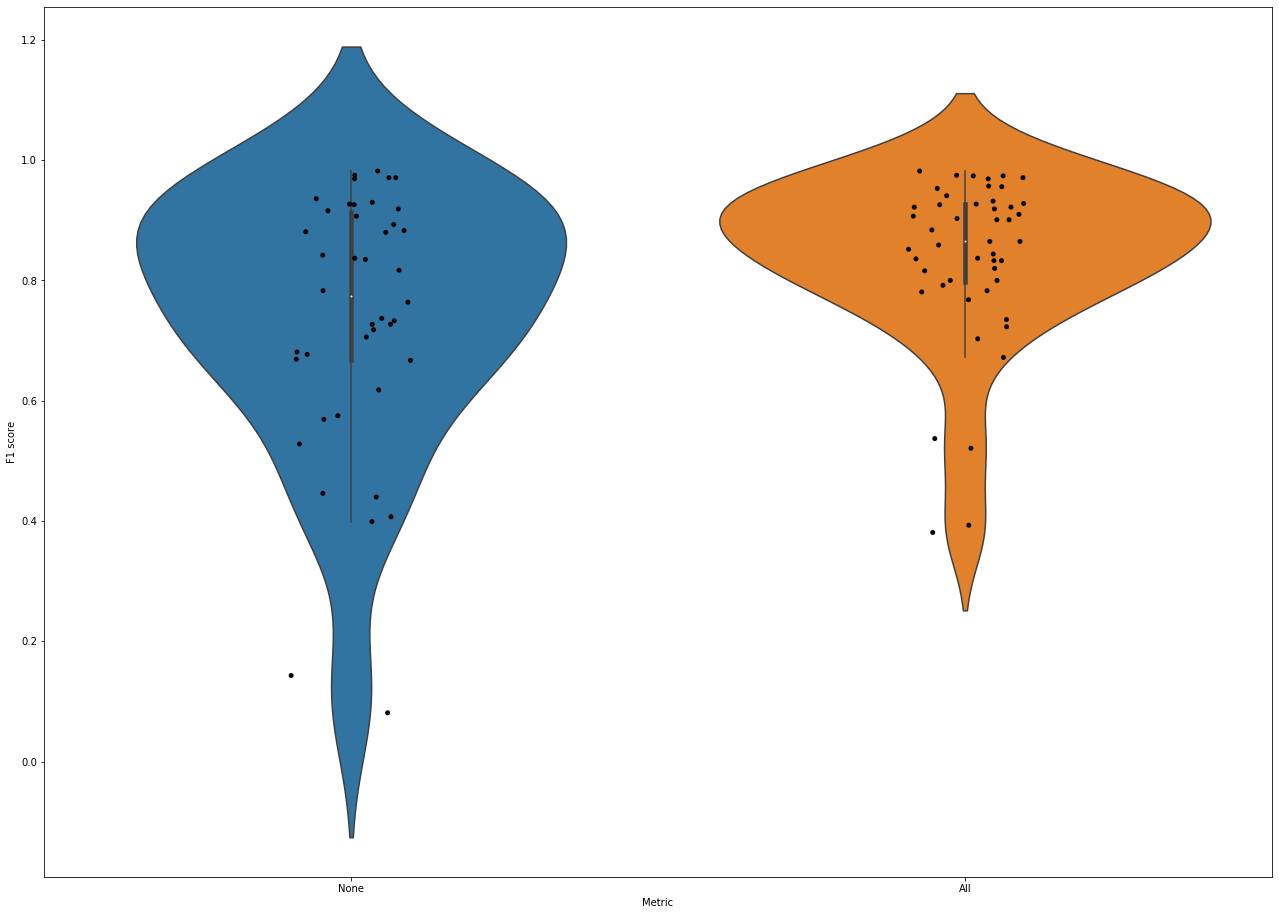

In [47]:
fig, ax = plt.subplots(figsize=(22,16))

m_an = measures[(measures['Metric'] == 254) | (measures['Metric'] == 0)]
sns.violinplot(ax = ax, x="Metric", y="F1 score", data=m_an, scale="count" )
sns.stripplot(ax = ax,  x="Metric", y="F1 score", data=m_an, jitter=True, color="Black")
ax.set_xticklabels(['None', 'All'])

### Plot some selected measures

We have too much data to plot them all, so lets just plot a few selected measures. Chosen almost at random, but not really

[Text(0, 0, 'none'),
 Text(0, 0, 'pg0 orf_length_med shannon_slope'),
 Text(0, 0, 'none pg0 orf_length_med shannon_slope'),
 Text(0, 0, 'none pg0 orf_length_med shannon_slope max_direction phmms'),
 Text(0, 0, 'none orf_length_med shannon_slope at_skew gc_skew max_direction phmms'),
 Text(0, 0, 'none pg0 orf_length_med shannon_slope at_skew gc_skew max_direction phmms')]

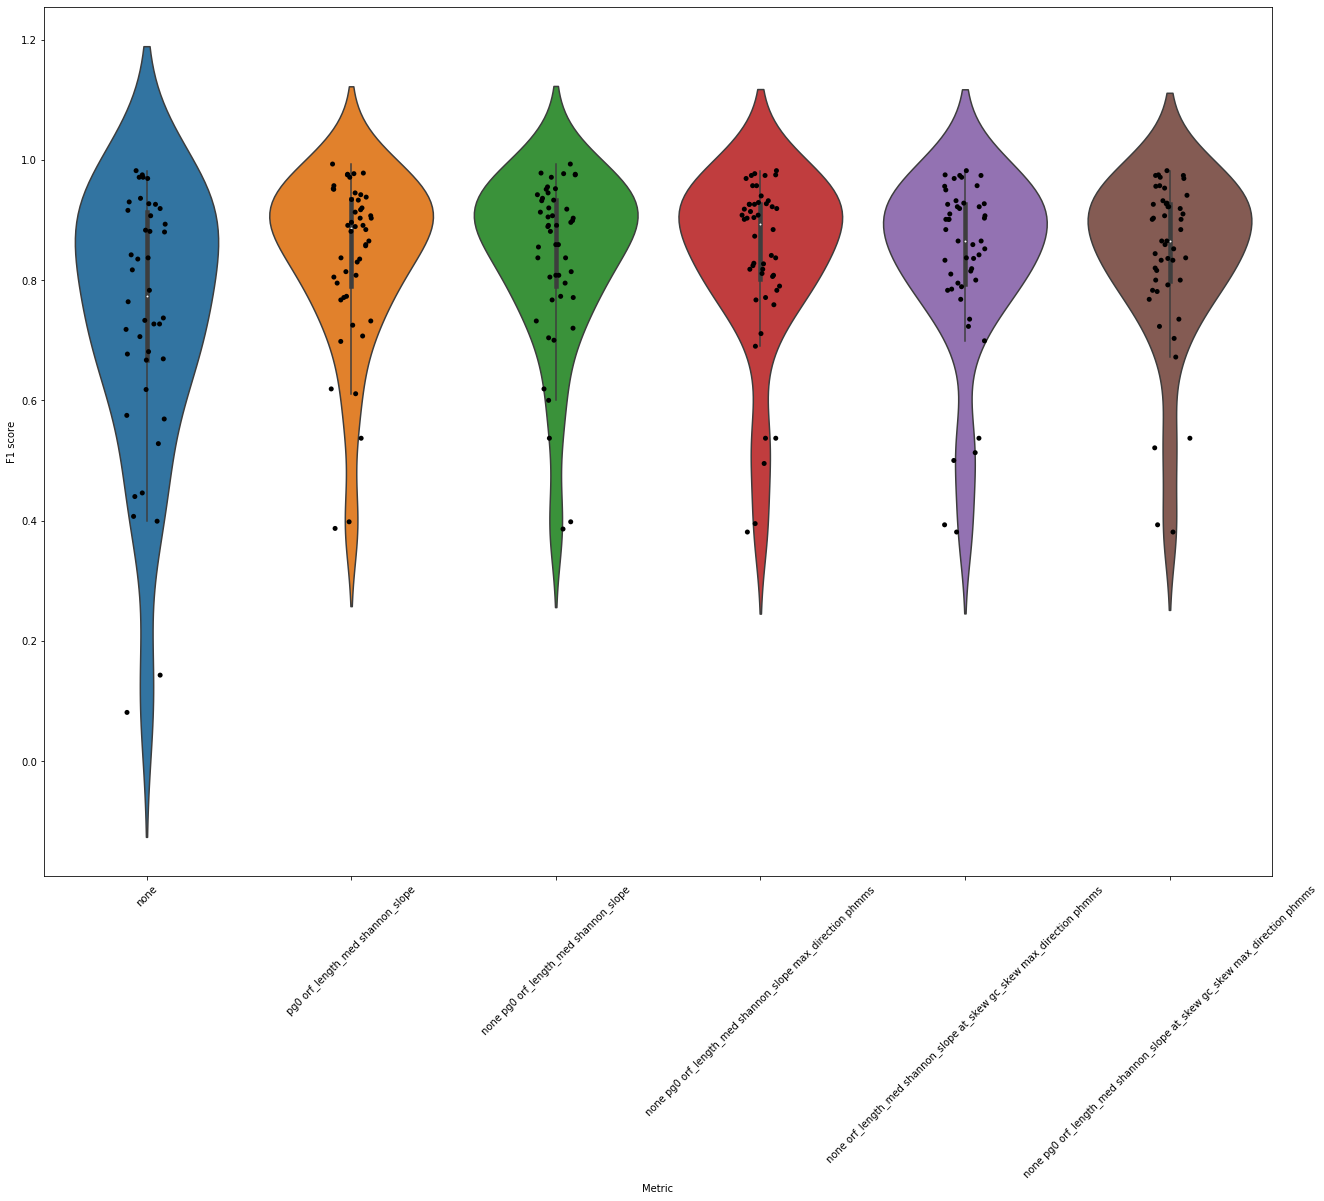

In [48]:
m_some = measures[(measures['Metric'] == 254) | (measures['Metric'] == 0) | (measures['Metric'] == 223)
                  | (measures['Metric'] == 57)
                  | (measures['Metric'] == 92)
                  | (measures['Metric'] == 252)
                 ]
fig, ax = plt.subplots(figsize=(22,16))


sns.violinplot(ax = ax, x="Metric", y="F1 score", data=m_some, scale="count" )
sns.stripplot(ax = ax,  x="Metric", y="F1 score", data=m_some, jitter=True, color="Black")
ax.set_xticklabels(list(mdf.iloc[m_some['Metric'].unique(),0]), rotation=45)

### Plot each metric alone

Note that for each metric, we need _none_ plus the metric, otherwise the results are misleading. Especially for `--phmms` and `--phagegenes` where the other metrics are set to the default.

So here we plot each metric alone, together with a version of _all_ metrics.

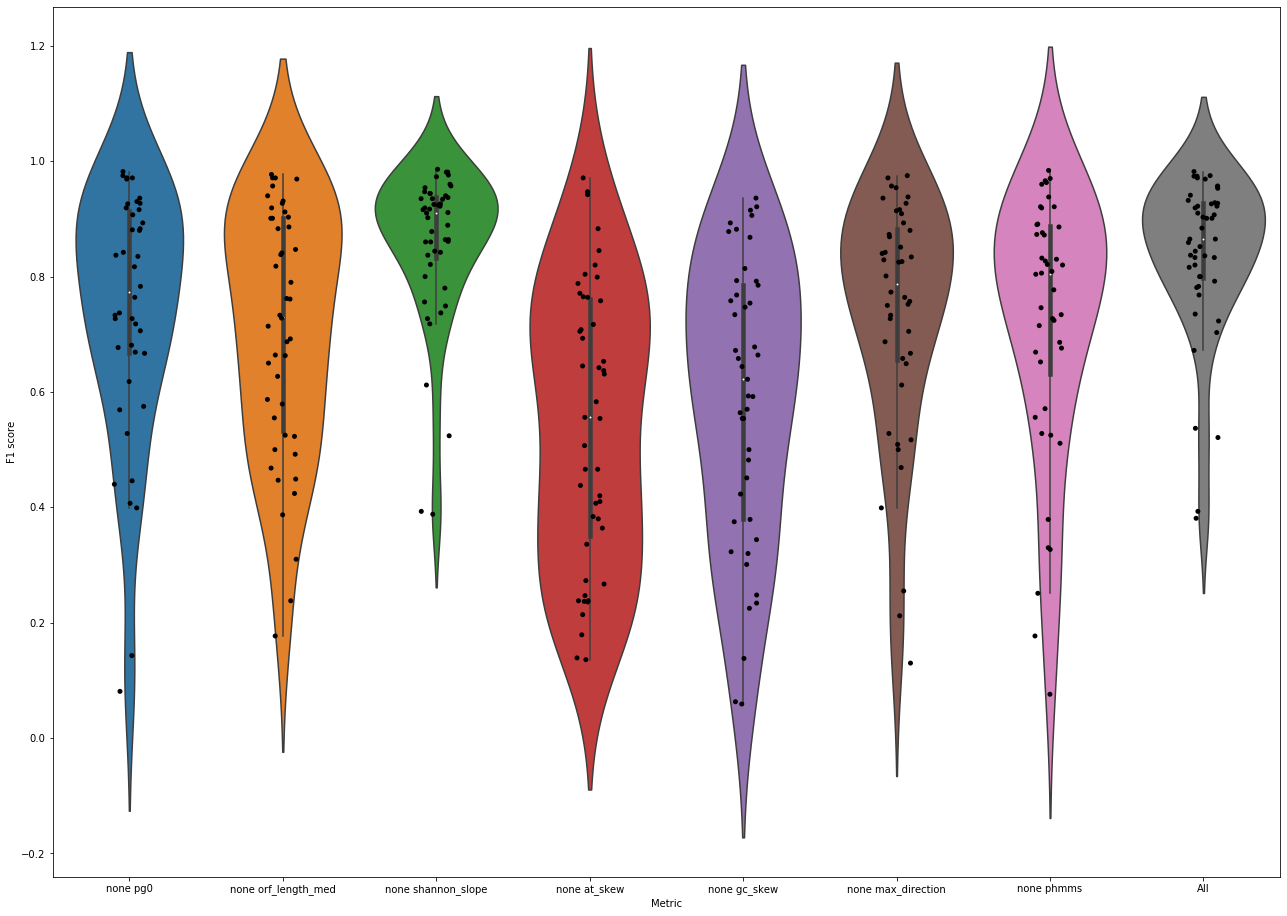

In [53]:
m_alone = measures[((measures['Metric'] >7) & (measures['Metric'] <15))
                   | (measures['Metric'] == 254)
                 ]
fig, ax = plt.subplots(figsize=(22,16))

labels = list(mdf.iloc[m_alone['Metric'].unique(),0])
labels[-1] = "All"

sns.violinplot(ax = ax, x="Metric", y="F1 score", data=m_alone, scale="count" )
sns.stripplot(ax = ax,  x="Metric", y="F1 score", data=m_alone, jitter=True, color="Black")
ax.set_xticklabels(labels)
fig.savefig('metrics_alone.png')

### Summary of the metrics

How do the F<sub>1</sub> scores vary across the metrics?

In [10]:
st = measures[['Metric', 'F1 score']].groupby('Metric').describe()
st.head()

F1 score                                                           
          count      mean       std    min     25%     50%      75%    max
Metric                                                                    
0          42.0  0.737905  0.218573  0.081  0.6675  0.7735  0.91375  0.982
1          48.0  0.837479  0.135261  0.392  0.7910  0.8675  0.92750  0.982
2          46.0  0.705435  0.215157  0.177  0.5325  0.7305  0.90100  0.977
3          48.0  0.855583  0.137362  0.386  0.8330  0.9105  0.93775  0.986
4          47.0  0.546489  0.253462  0.131  0.2910  0.5820  0.76050  0.971

### Plot the different metrics

Well there are a lot of colours. 

The more metrics we add, the better we get!

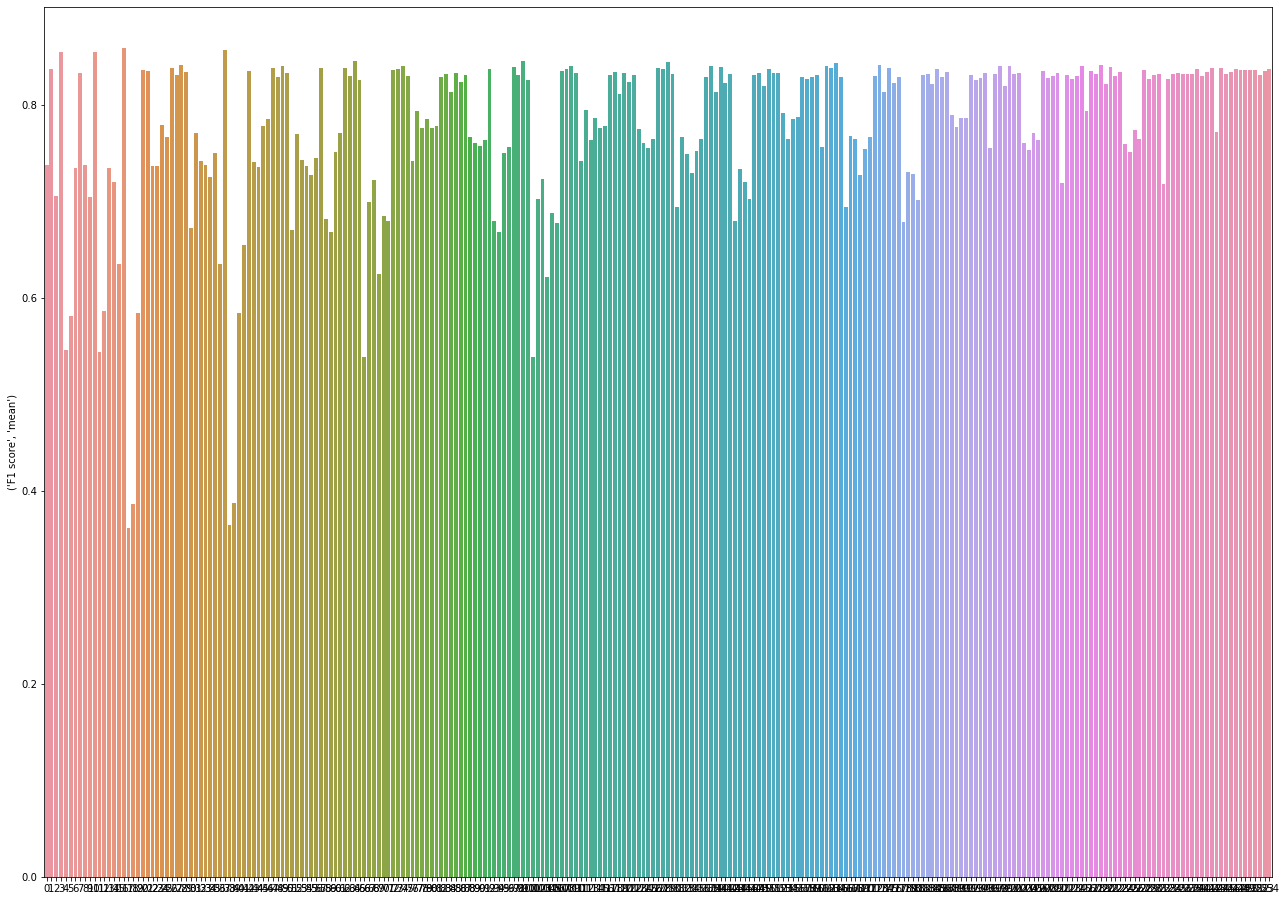

In [12]:
fig, ax = plt.subplots(figsize=(22,16))


sns.barplot(ax = ax, x=st.index.values, y=('F1 score',  'mean'), data=st)

### Find some good, and bad, metrics

Lets see which combinations of metrics are good and bad.

Note that we join the tables here, so we get the definitions of the metrics, not just the numbers.

In [22]:
f_good = st[st[('F1 score',  'mean')] > 0.84]
f_good

F1 score                                                            
          count      mean       std    min      25%     50%      75%    max
Metric                                                                     
3          48.0  0.855583  0.137362  0.386  0.83300  0.9105  0.93775  0.986
10         48.0  0.855417  0.137441  0.388  0.83300  0.9105  0.93775  0.986
16         48.0  0.858771  0.131826  0.388  0.83300  0.9105  0.93875  0.986
28         48.0  0.841667  0.151684  0.296  0.80375  0.8830  0.94125  0.983
37         48.0  0.857313  0.132685  0.388  0.83225  0.9095  0.93875  0.986
49         48.0  0.841083  0.151390  0.296  0.80425  0.8815  0.94100  0.983
64         48.0  0.845562  0.144098  0.296  0.80075  0.8840  0.94125  0.983
74         48.0  0.840938  0.143374  0.381  0.80900  0.8805  0.92750  0.982
99         48.0  0.846188  0.142009  0.296  0.80075  0.8830  0.94125  0.983
109        48.0  0.840521  0.143550  0.381  0.80075  0.8805  0.92825  0.984
129        48.0  0.844375  0.136636  0.381  0.80150  0.8795  0.92825  0.982
138        48.0  0.840979  0.141223  0.298  0.79050  0.8840  0.92875  0.982
162        48.0  0.840833  0.139957  0.386  0.79350  0.8865  0.93700  0.982
164        48.0  0.843646  0.136945  0.381  0.79775  0.8805  0.92825  0.982
173        48.0  0.842083  0.141248  0.298  0.79050  0.8800  0.93000  0.982
198        48.0  0.840458  0.134961  0.393  0.78950  0.8800  0.92800  0.982
200        48.0  0.840083  0.136385  0.389  0.77950  0.8775  0.92625  0.987
215        48.0  0.840083  0.144868  0.381  0.80475  0.8925  0.93050  0.987
219        48.0  0.841313  0.134414  0.395  0.79650  0.8825  0.92725  0.982

In [23]:
pd.merge(f_good, mdf, left_index=True, right_index=True)

,"(F1 score, count)","(F1 score, mean)","(F1 score, std)","(F1 score, min)","(F1 score, 25%)","(F1 score, 50%)","(F1 score, 75%)","(F1 score, max)",Metric
3,48.0,0.855583,0.137362,0.386,0.83300,0.9105,0.93775,0.986,shannon_slope
10,48.0,0.855417,0.137441,0.388,0.83300,0.9105,0.93775,0.986,none shannon_slope
16,48.0,0.858771,0.131826,0.388,0.83300,0.9105,0.93875,0.986,pg0 shannon_slope
28,48.0,0.841667,0.151684,0.296,0.80375,0.8830,0.94125,0.983,shannon_slope max_direction
37,48.0,0.857313,0.132685,0.388,0.83225,0.9095,0.93875,0.986,none pg0 shannon_slope
49,48.0,0.841083,0.151390,0.296,0.80425,0.8815,0.94100,0.983,none shannon_slope max_direction
64,48.0,0.845562,0.144098,0.296,0.80075,0.8840,0.94125,0.983,pg0 shannon_slope max_direction
74,48.0,0.840938,0.143374,0.381,0.80900,0.8805,0.92750,0.982,orf_length_med shannon_slope max_direction
99,48.0,0.846188,0.142009,0.296,0.80075,0.8830,0.94125,0.983,none pg0 shannon_slope max_direction
109,48.0,0.840521,0.143550,0.381,0.80075,0.8805,0.92825,0.984,none orf_length_med shannon_slope max_direction


In [15]:
f_bad = st[st[('F1 score',  'mean')] < 0.5]
f_bad_code = pd.merge(f_bad, mdf, left_index=True, right_index=True)
f_bad_code

,"(F1 score, count)","(F1 score, mean)","(F1 score, std)","(F1 score, min)","(F1 score, 25%)","(F1 score, 50%)","(F1 score, 75%)","(F1 score, max)",Metric
17,47.0,0.361617,0.259578,0.032,0.1455,0.301,0.5035,0.971,pg0 at_skew
18,45.0,0.386244,0.279664,0.027,0.1660,0.341,0.5670,0.960,pg0 gc_skew
38,47.0,0.364851,0.259334,0.032,0.1585,0.310,0.5060,0.971,none pg0 at_skew
39,45.0,0.388022,0.279312,0.026,0.1650,0.352,0.5850,0.920,none pg0 gc_skew


In [16]:
max(st[('F1 score',  'mean')])

0.8587708333333336